In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Data Preparation and Cleaning

In [13]:
df_train = pd.read_csv("./Data/npf_train.csv")
df_test = pd.read_csv("./Data/npf-test.csv")

In [14]:
def data_cleaner(df):
    data = df.copy()
    #remove the id, partlybad columns
    data.drop(["id","partlybad","date"],1,inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data
df_train = data_cleaner(df_train)
df_test = data_cleaner(df_test)
df_train

/var/folders/1r/vj3w2rcx0gx3s0pc167jw_xr0000gn/T/ipykernel_30775/4207997387.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(["id","partlybad","date"],1,inplace=True)
/var/folders/1r/vj3w2rcx0gx3s0pc167jw_xr0000gn/T/ipykernel_30775/4207997387.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(["id","partlybad","date"],1,inplace=True)


class2    class4  CO2168.mean  CO2168.std  CO2336.mean  CO2336.std  \
0       event        Ib   368.771711    0.310309   368.665658    0.305127   
1    nonevent  nonevent   378.197295    1.001493   378.083089    1.025472   
2       event        Ib   373.043158    0.749865   372.930066    0.728411   
3       event        II   375.643019    0.558629   375.549430    0.540964   
4    nonevent  nonevent   377.661030    0.408421   377.609576    0.423963   
..        ...       ...          ...         ...          ...         ...   
459  nonevent  nonevent   381.016623    4.411571   381.030844    4.062115   
460  nonevent  nonevent   383.698146    8.418351   384.052632    8.130389   
461  nonevent  nonevent   379.279128   12.045785   379.363087   11.533353   
462  nonevent  nonevent   384.443758    6.413297   384.364392    5.781036   
463  nonevent  nonevent   382.230839    6.407469   382.448601    6.242533   

     CO242.mean  CO242.std  CO2504.mean  CO2504.std  ...  T672.mean  T672.std  \
0    369.371184   0.333606   368.616053    0.302364  ...  -1.476016  0.250952   
1    378.671311   1.017208   378.029508    1.022258  ...   1.479493  0.313460   
2    373.569735   0.835240   372.869868    0.692828  ...  -0.270844  2.037111   
3    376.045849   0.580730   375.506013    0.529970  ...   5.622308  2.509758   
4    378.117134   0.417243   377.582242    0.424460  ...   1.140121  1.438071   
..          ...        ...          ...         ...  ...        ...       ...   
459  382.901742   5.061991   381.072078    3.840630  ...  16.319361  1.089563   
460  386.436800   9.901536   384.105592    7.952936  ...  15.820245  2.868514   
461  381.268591  14.043508   379.163200   10.932955  ...  14.421092  1.696894   
462  386.384762   7.663215   384.186892    5.506259  ...  15.049728  0.969001   
463  384.061748   7.748701   382.502587    6.174042  ...  21.040539  2.466867   

      T84.mean   T84.std  UV_A.mean   UV_A.std  UV_B.mean  UV_B.std   CS.mean  \
0    -0.899393  0.271648   2.492491   1.310880   0.031587  0.018122  0.000243   
1     2.033191  0.271090   0.295937   0.177836   0.005140  0.003552  0.003658   
2     0.780422  2.334741  14.434789   8.627312   0.353743  0.272472  0.000591   
3     6.533544  2.695277  16.077513   9.984686   0.568242  0.451830  0.002493   
4     2.133774  1.614122   9.710422   7.054069   0.339135  0.291457  0.004715   
..         ...       ...        ...        ...        ...       ...       ...   
459  17.268471  1.308728   8.688739   8.320799   0.464422  0.496816  0.002423   
460  16.352391  3.055122  18.475262  12.838481   0.884404  0.726461  0.002476   
461  15.094141  1.745526   8.099394   5.851942   0.416961  0.363890  0.003484   
462  16.076217  1.197644  11.665070  10.062797   0.622831  0.595032  0.004782   
463  21.946135  2.604069  16.670267  11.216294   0.899029  0.722553  0.006956   

       CS.std  
0    0.000035  
1    0.000940  
2    0.000191  
3    0.000466  
4    0.000679  
..        ...  
459  0.000425  
460  0.000902  
461  0.000457  
462  0.001082  
463  0.000605  

[464 rows x 102 columns]

In [25]:
df_train_binary = df_train.drop("class4",axis = 1)
df_train_binary.replace(to_replace=["event","nonevent"],value=[1,0],inplace=True)

# Feature Selection

1. Remove featrues who are not relevant to label.

<AxesSubplot:>

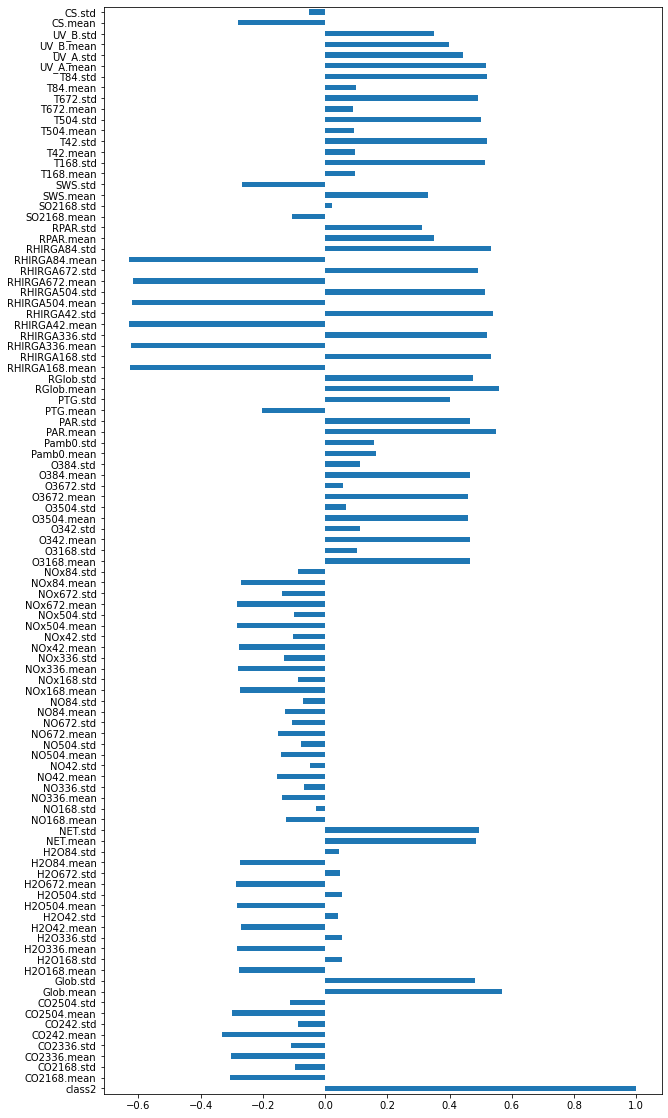

In [27]:
df_train_binary =  df_train_binary[df_train_binary.columns].apply(lambda x:x.astype(float))
(df_train_binary.corr().loc['class2'] 
 .plot(kind='barh', figsize=(10,20)))


<AxesSubplot:>

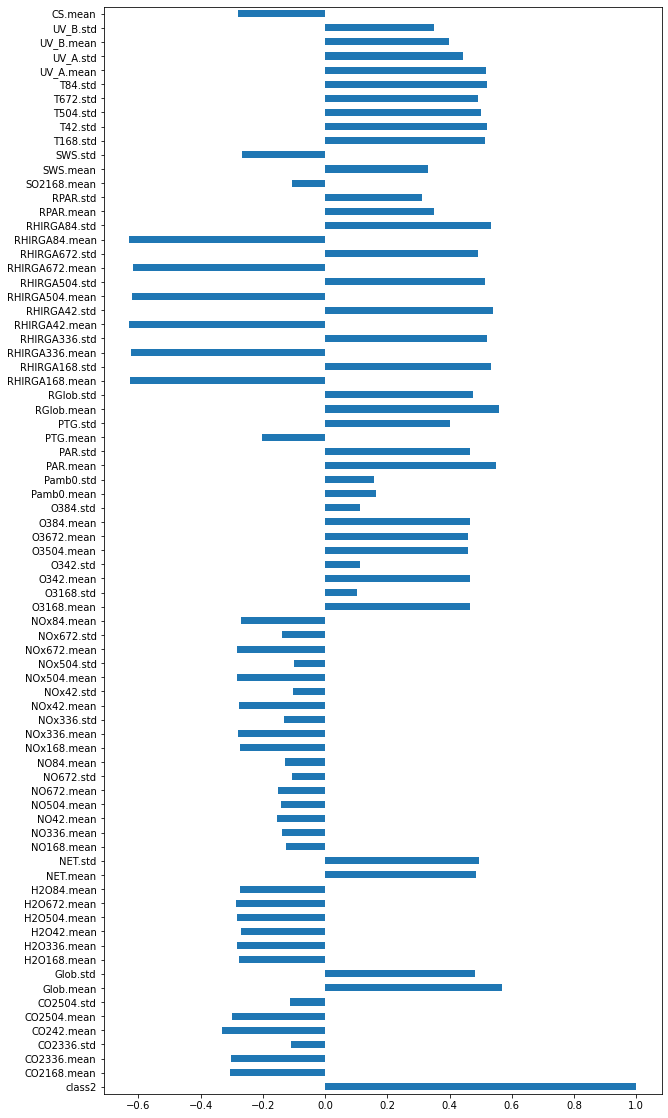

In [29]:
corr = abs(df_train_binary.corr().loc['class2']) 
corr = corr[corr<=0.1] 
cols_to_drop = corr.index.to_list() 
df_train_binary = df_train_binary.drop(cols_to_drop, axis=1)
(df_train_binary.corr().loc['class2'] 
 .plot(kind='barh', figsize=(10,20)))

In [30]:
def get_var_no_colinear(cutoff, df):
    corr_high = df.corr().applymap(lambda x: np.nan if x>cutoff else x).isnull()
    col_all = corr_high.columns.tolist()
    del_col = []
    i = 0
    while i < len(col_all)-1:
        ex_index = corr_high.iloc[:,i][i+1:].index[np.where(corr_high.iloc[:,i][i+1:])].tolist()
        for var in ex_index:
            col_all.remove(var)
        corr_high = corr_high.loc[col_all, col_all]
        i += 1
    return col_all

In [32]:
df_train_binary = pd.DataFrame(df_train_binary,columns = get_var_no_colinear(0.98,df_train_binary))
df_train_binary

class2  CO2168.mean  CO2336.std   Glob.mean    Glob.std  H2O168.mean  \
0       1.0   368.771711    0.305127   41.650106   29.942679     4.383158   
1       0.0   378.197295    1.025472    3.478842    2.165706     7.233852   
2       1.0   373.043158    0.728411  297.954063  188.348344     3.575000   
3       1.0   375.643019    0.540964  324.318386  193.207278     6.500566   
4       0.0   377.661030    0.423963  167.479964  135.294894     6.223576   
..      ...          ...         ...         ...         ...          ...   
459     0.0   381.016623    4.062115  121.227780  131.474300    15.121299   
460     0.0   383.698146    8.130389  332.744478  243.722645    10.946556   
461     0.0   379.279128   11.533353  114.298822   99.583613    13.131946   
462     0.0   384.443758    5.781036  180.454576  181.538036    13.616242   
463     0.0   382.230839    6.242533  297.137573  208.858699    15.116923   

       NET.mean  NO168.mean  NO42.mean  NO672.mean  ...  RHIRGA672.std  \
0    -18.904776    0.015658   0.009342    0.010000  ...       3.124422   
1     16.909002    0.069672   0.056148    0.079508  ...       0.977253   
2    146.523400    0.037829   0.032450    0.036821  ...      13.751257   
3    191.957743    0.127547   0.116541    0.136329  ...       8.926948   
4    120.876883    0.144303   0.103537    0.146909  ...       8.175362   
..          ...         ...        ...         ...  ...            ...   
459  112.010483    0.022201   0.021250    0.027673  ...       5.430262   
460  233.307016    0.057613   0.040516    0.056667  ...      17.434294   
461   78.339978    0.049675   0.037922    0.051688  ...       6.535173   
462  136.129920    0.047338   0.040000    0.059412  ...       6.732198   
463  232.929059    0.017973   0.012953    0.027181  ...      14.007050   

     RPAR.mean   RPAR.std  SO2168.mean    SWS.mean    SWS.std  T168.std  \
0     4.437546   3.710280     0.114474  937.880000   0.600000  0.260461   
1     3.755908   2.801478     0.301803  936.000000   0.707107  0.279675   
2    36.968879  23.779696     0.116250  923.745098   2.161880  2.226999   
3    41.155687  25.166374     0.316289  925.622642   1.389887  2.650631   
4    23.190158  18.147788     0.692000  921.727273   2.578074  1.551858   
..         ...        ...          ...         ...        ...       ...   
459   7.864272   8.128171     0.163403  915.250000   1.902379  1.233771   
460  30.378113  20.920857     0.118561  890.500000   9.394365  2.949354   
461   8.108832   6.346370     0.077373  879.032258  21.784314  1.750257   
462  12.257337  12.242396     0.234548  883.048387   5.289728  1.110904   
463  22.985843  15.049501     0.394607  915.350000   1.363259  2.563405   

     T672.std  UV_B.mean   CS.mean  
0    0.250952   0.031587  0.000243  
1    0.313460   0.005140  0.003658  
2    2.037111   0.353743  0.000591  
3    2.509758   0.568242  0.002493  
4    1.438071   0.339135  0.004715  
..        ...        ...       ...  
459  1.089563   0.464422  0.002423  
460  2.868514   0.884404  0.002476  
461  1.696894   0.416961  0.003484  
462  0.969001   0.622831  0.004782  
463  2.466867   0.899029  0.006956  

[464 rows x 38 columns]

In [35]:
x_binary_train = df_train_binary.iloc[:,1:38]
y_binary_train = df_train_binary["class2"]

In [40]:
x_binary_test = pd.DataFrame(df_test,columns=x_binary_train.columns)
y_binary_test = df_test["class2"]
y_binary_test.replace(to_replace=["event"], value=1., inplace=True)
y_binary_test.replace(to_replace=["nonevent"], value=0., inplace=True)

# Binary Classification

Accuracy on Train: 0.9137931034482759
Cross validation Accuracy:  0.8298334875115634 {'max_depth': 3}


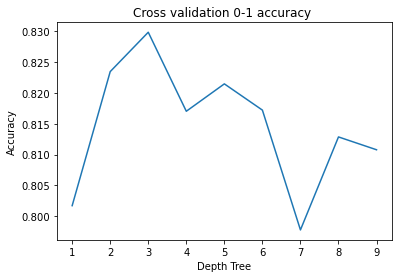

Accuracy on Test: 0.8497409326424871


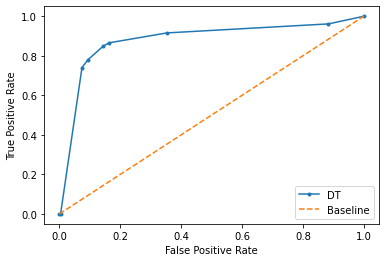

In [41]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), parameters, n_jobs=4, cv=10)
clf.fit(X=x_binary_train, y=y_binary_train)
tree_model = clf.best_estimator_

y_pred_train = tree_model.predict(x_binary_train)

print("Accuracy on Train:",metrics.accuracy_score(y_binary_train, y_pred_train))

print ('Cross validation Accuracy: ', clf.best_score_, clf.best_params_) 

cv_accuracy = clf.cv_results_['mean_test_score']
plt.plot(range(1,10) ,cv_accuracy)
plt.title('Cross validation 0-1 accuracy ')
plt.xlabel('Depth Tree')
plt.ylabel('Accuracy')
plt.show()

y_pred = tree_model.predict(x_binary_test)
# probabilities of class event
y_pred_proba = tree_model.predict_proba(x_binary_test)[:,0]

print("Accuracy on Test:",metrics.accuracy_score(y_binary_test, y_pred))



fpr, tpr, thresholds = metrics.roc_curve(y_binary_test, 1-y_pred_proba)
metrics.auc(fpr, tpr)

plt.plot(fpr,tpr , marker='.', label='DT')
plt.plot(fpr, fpr, linestyle='--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Visualize the tree

[Text(0.5, 0.875, 'RHIRGA168.mean <= 72.737\ngini = 0.5\nsamples = 464\nvalue = [232, 232]\nclass = nonevent'),
 Text(0.25, 0.625, 'H2O168.mean <= 11.44\ngini = 0.345\nsamples = 253\nvalue = [56, 197]\nclass = event'),
 Text(0.125, 0.375, 'H2O168.mean <= 9.628\ngini = 0.164\nsamples = 211\nvalue = [19, 192]\nclass = event'),
 Text(0.0625, 0.125, 'gini = 0.092\nsamples = 186\nvalue = [9, 177]\nclass = event'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 25\nvalue = [10, 15]\nclass = event'),
 Text(0.375, 0.375, 'CS.mean <= 0.003\ngini = 0.21\nsamples = 42\nvalue = [37, 5]\nclass = nonevent'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = event'),
 Text(0.4375, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [34, 1]\nclass = nonevent'),
 Text(0.75, 0.625, 'CS.mean <= 0.002\ngini = 0.277\nsamples = 211\nvalue = [176, 35]\nclass = nonevent'),
 Text(0.625, 0.375, 'RGlob.mean <= 19.272\ngini = 0.471\nsamples = 79\nvalue = [49, 30]\nclass = nonevent'),
 Text(0.5625, 0.1

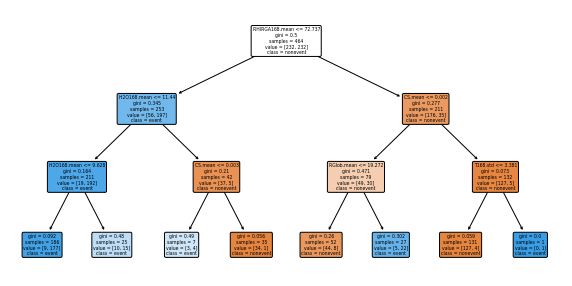

In [46]:
from sklearn.tree import plot_tree
from matplotlib import rcParams 
rcParams['figure.figsize'] = (10, 5)
plot_tree(tree_model, 
          feature_names = x_binary_train.columns, 
          class_names = ["nonevent","event"], 
          filled = True, 
          rounded = True)

# Multiclass Classification

In [47]:
x_multi_train = x_binary_train
y_multi_train = df_train["class4"]
x_multi_test = x_binary_test
y_multi_test = df_test["class4"]

Accuracy on Train: 0.6637931034482759
Cross validation Accuracy:  0.6358464384828861 {'max_depth': 2}


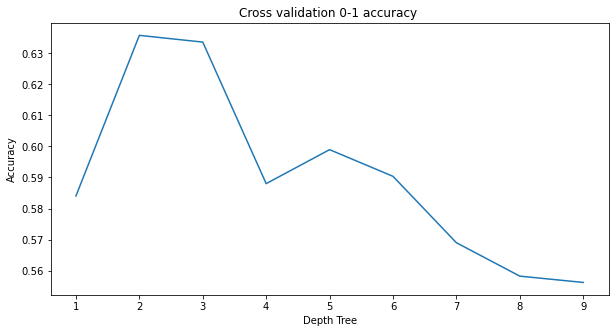

Accuracy on Test: 0.6704663212435233


In [48]:
parameters = {'max_depth':range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), parameters, n_jobs=4, cv=10)
clf.fit(X=x_multi_train, y=y_multi_train)
tree_model = clf.best_estimator_

y_pred_train = tree_model.predict(x_multi_train)

print("Accuracy on Train:",metrics.accuracy_score(y_multi_train, y_pred_train))

print ('Cross validation Accuracy: ', clf.best_score_, clf.best_params_) 

cv_accuracy = clf.cv_results_['mean_test_score']
plt.plot(range(1,10) ,cv_accuracy)
plt.title('Cross validation 0-1 accuracy ')
plt.xlabel('Depth Tree')
plt.ylabel('Accuracy')
plt.show()

y_pred = tree_model.predict(x_multi_test)
# probabilities of class event
y_pred_proba = tree_model.predict_proba(x_multi_test)[:,0]

print("Accuracy on Test:",metrics.accuracy_score(y_multi_test, y_pred))

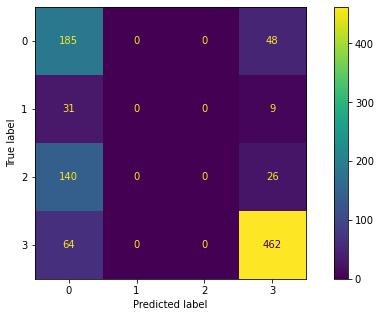

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
rcParams['figure.figsize'] = (10, 5)
cm = confusion_matrix(y_multi_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 0.8333333333333334, 'RHIRGA168.mean <= 72.737\ngini = 0.652\nsamples = 464\nvalue = [113, 34, 85, 232]\nclass = Ia'),
 Text(0.25, 0.5, 'H2O168.mean <= 11.44\ngini = 0.702\nsamples = 253\nvalue = [99, 23, 75, 56]\nclass = Ib'),
 Text(0.125, 0.16666666666666666, 'gini = 0.654\nsamples = 211\nvalue = [95, 23, 74, 19]\nclass = Ib'),
 Text(0.375, 0.16666666666666666, 'gini = 0.214\nsamples = 42\nvalue = [4, 0, 1, 37]\nclass = Ia'),
 Text(0.75, 0.5, 'CS.mean <= 0.002\ngini = 0.295\nsamples = 211\nvalue = [14, 11, 10, 176]\nclass = Ia'),
 Text(0.625, 0.16666666666666666, 'gini = 0.567\nsamples = 79\nvalue = [11, 9, 10, 49]\nclass = Ia'),
 Text(0.875, 0.16666666666666666, 'gini = 0.074\nsamples = 132\nvalue = [3, 2, 0, 127]\nclass = Ia')]

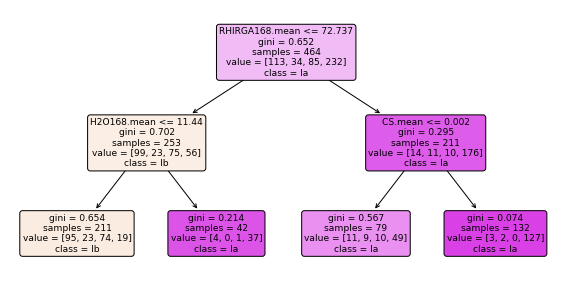

In [51]:
plot_tree(tree_model, 
          feature_names = x_multi_train.columns, 
          class_names = y_multi_train.unique(), 
          filled = True, 
          rounded = True)